### Import the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model, to_categorical
from keras.datasets import cifar10

### Load Dataset

In [2]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 85s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_train.shape

(50000, 1)

In [9]:
labels=['airplane','automobile', 'bird', 'cat', 'deer', 'dog',
        'frog', 'horse', 'ship', 'truck']

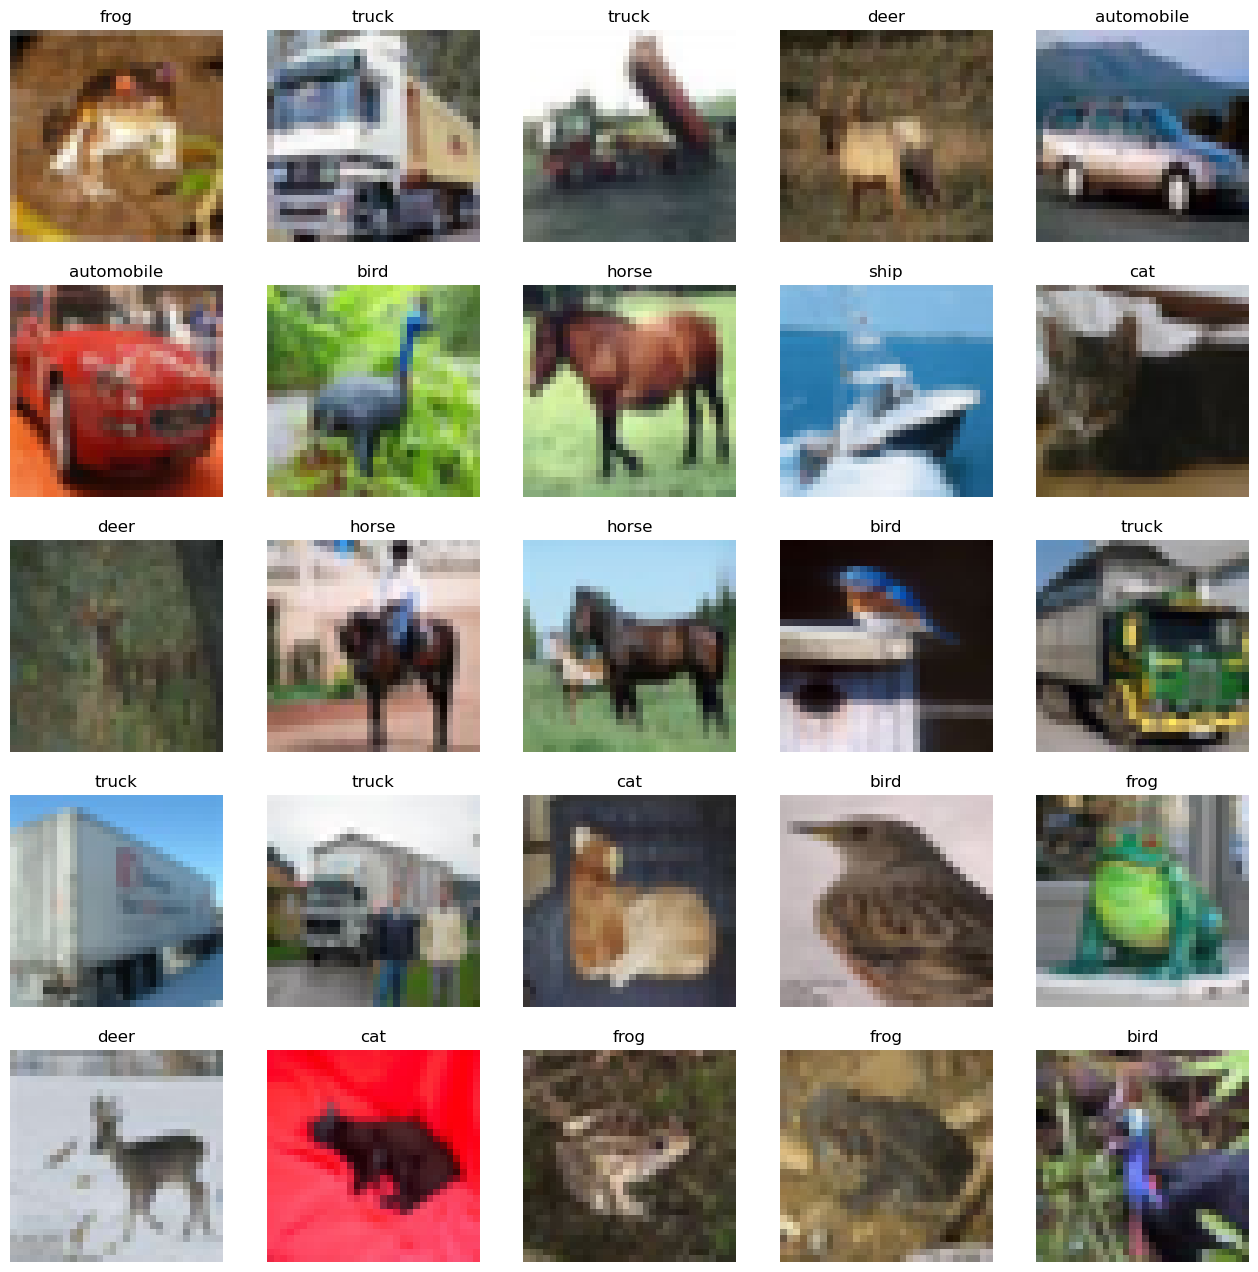

In [16]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])

### Scale the data

In [17]:
x_train= x_train/255
x_test= x_test/255

### Build the model

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)              

### Compile the model

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [24]:
model.fit(x_train,y_train,epochs=10,batch_size=20)

Epoch 1/10


2500/2500 [==============================] - 19s 7ms/step - loss: 1.4742 - accuracy: 0.4664
Epoch 2/10
2500/2500 [==============================] - 17s 7ms/step - loss: 1.1445 - accuracy: 0.5955
Epoch 3/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.9963 - accuracy: 0.6499
Epoch 4/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8927 - accuracy: 0.6848
Epoch 5/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.8081 - accuracy: 0.7162
Epoch 6/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.7319 - accuracy: 0.7406
Epoch 7/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.6695 - accuracy: 0.7624
Epoch 8/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.6119 - accuracy: 0.7828
Epoch 9/10
2500/2500 [==============================] - 17s 7ms/step - loss: 0.5612 - accuracy: 0.8012
Epoch 10/10
2500/2500 [==============================] - 17s 7ms/step -

### Evaluate on test set

In [25]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 38s 4ms/step - loss: 1.0106 - accuracy: 0.6894


[1.0105723142623901, 0.6894000172615051]

### Predict on Image

In [52]:
import cv2

img= cv2.imread('images/horse.png')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img= cv2.resize(img, (32,32))
img= img/255

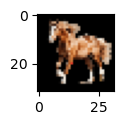

In [53]:
plt.figure(figsize=(1,1))
plt.imshow(img)

In [54]:
img= img.reshape(1,32,32,3)
labels[model.predict(img).argmax()]

1/1 [==============================] - 0s 42ms/step


'horse'